# Refresco teoria

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=101)
#creating LinearRegression Object
lm = LinearRegression(n_jobs=-1)  # -1 to use all processors
#Training the Data Model
lm.fit(X_train, y_train)
# Using our model to predict test values
predictions = lm.predict(X_test)


# Error Calculations
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# Score of our model in %
lm.score(X_train, y_train) * 100 # Entrenamiento

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [86]:
train_data = pd.read_csv('diamonds_train.csv')
test_data = pd.read_csv('diamonds_test.csv')
sample_data = pd.read_csv('sample_submission.csv')

<AxesSubplot:>

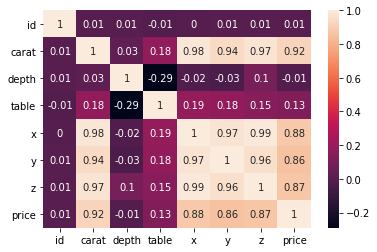

In [87]:
train = train_data.rename(columns={'Unnamed: 0': 'id'})
test = test_data.rename(columns={'Unnamed: 0': 'id'})
sns.heatmap(round(train.corr(), 2), annot=True)

In [88]:
train.groupby('clarity').mean()

,id,carat,depth,table,x,y,z,price
clarity,,,,,,,,
I1,19265.142857,1.248065,62.784991,58.231826,6.708463,6.654195,4.170579,3758.650995
IF,20288.929515,0.502783,61.486197,56.524670,4.960756,4.982533,3.055712,2859.307636
SI1,20179.751000,0.850281,61.856343,57.679469,5.888661,5.888575,3.639787,3993.459953
SI2,20056.054042,1.077384,61.775205,57.923155,6.400836,6.400208,3.948771,5077.594610
VS1,20137.170464,0.724893,61.674201,57.305589,5.565843,5.576905,3.434119,3815.384691
VS2,20254.778492,0.762838,61.720680,57.436675,5.655148,5.656205,3.490012,3913.506646
VVS1,20185.512528,0.500741,61.644952,56.867539,4.954068,4.968537,3.058489,2519.588430
VVS2,20294.968896,0.594927,61.649222,57.024780,5.215832,5.230057,3.219145,3291.981337


In [89]:
test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63
...,...,...,...,...,...,...,...,...,...,...
13444,13444,1.05,Ideal,F,SI2,60.3,55.0,6.55,6.68,3.99
13445,13445,0.27,Very Good,G,VS1,61.9,56.0,4.13,4.16,2.56
13446,13446,1.50,Premium,D,VS2,61.8,60.0,7.30,7.37,4.53
13447,13447,1.70,Premium,F,SI2,60.2,61.0,7.79,7.68,4.66


In [90]:
X_train = np.array(train[['carat', 'x', 'y', 'z']])
y_train = np.array(train['price'])

X_test = np.array(test[['carat', 'x', 'y', 'z']])

lm = LinearRegression(n_jobs=-1)  # -1 to use all processors

#Training the Data Model
lm.fit(X_train, y_train)

# Using our model to predict test values
y_pred = lm.predict(X_test)

In [91]:
prediction_df = sample_data.copy()
prediction_df['price'] = y_pred
prediction_df.to_csv('prediction_Alfon.csv', index=False)

In [92]:
X_train[:, 0]

array([1.21, 0.28, 0.42, ..., 0.57, 1.01, 0.54])

# Polinomial

In [117]:
degree = 3

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train[:, 0].reshape(-1, 1), y_train)
X_poly_t = polinominal_model.fit_transform(X_test[:, 0].reshape(-1, 1), y_train)

#######
print(X_poly)
print(X_poly.shape)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly_t)

print("y_pred", y_pred.shape)
# print("Score:", r2_score(y_train, y_pred))

# X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train[:, 0], y_train)))
# plt.scatter(X_train_to_show, y_train_to_show, color='b')
# X_train_to_show, y_pred = zip(*sorted(zip(X_train[:, 0], y_pred)))
# plt.plot(X_train_to_show, y_pred, color='red')
# plt.scatter(X_train_to_show, y_pred, color='red')
# plt.title("Poninominal degree " + str(degree))
# plt.show()

[[1.       1.21     1.4641   1.771561]
 [1.       0.28     0.0784   0.021952]
 [1.       0.42     0.1764   0.074088]
 ...
 [1.       0.57     0.3249   0.185193]
 [1.       1.01     1.0201   1.030301]
 [1.       0.54     0.2916   0.157464]]
(40345, 4)
y_pred (13449,)


In [118]:
prediction_df = sample_data.copy()
prediction_df['price'] = y_pred
prediction_df.to_csv('prediction_Alfon_p3_c.csv', index=False)